#### Cross Validation is an important part of machine learning. There are different ways for cross validation. 
We can use it to evaluate:
- what models are more effective
- what parameters to use for a specific model
- selecting features

In [2]:
%matplotlib inline

#### Model Evaluation Metrics
In order to evaluate each model system, we need to have metrics systems to help us. 
- for classification: the target(s) are category data, so we use ***metrics.accuracy_score*** for measuring
- for regression: the target(s) are continuous data. The goal is to ___minimize___ them in the loss functions:
  * **Mean Absolute Error (MAE): metrics.mean_absolute_error** 
  $$mae = \frac{1}{n}\sum_{i=0}^n|y_{i} - \bar{y}_{i}|$$
  * **Mean Square Error (MSE): metics.mean_squared_error **
  $$mse = \frac{1}{n}\sum_{i=0}^n(y_{i} - \bar{y}_{i})^2$$
  * **Root Mean Square Error (RMSE) **
  $$rmse = \sqrt{\frac{1}{n}\sum_{i=0}^n(y_{i} - \bar{y}_{i})^2}$$

In [3]:
# without cross_validation
import pandas as pd
import numpy as np

# note: sklearn.cross_validation import train_test_split will be deprecated
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import svm
from sklearn.datasets import load_iris

# fetch data first
X = load_iris().data
y = load_iris().target

# preprocessing data and split it into train and test sets
X = preprocessing.scale(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# model
clf = svm.SVC(kernel='linear', C=1)
clf.fit(X_train, y_train)
print("The model score is:", clf.score(X_test, y_test))

The model score is: 1.0


When we do train_test_split, part of the samples are used for testing. However, it provides a high variance estimate since changing which observations happen to be in the testing set can significantly change testing accuracy!

How to make use of those test data for training. K-folds cross_validation would solve this problem:
- A model is trained using k-1 of the folds as training data;
- the resulting model is validated on the remaining part of the data (i.e., it is used as a test set to compute a performance measure such as accuracy).
- The performance measure reported by k-fold cross-validation is then the average of the values computed in the loop (using different test sets).

In [74]:
# Here is the step by step cross validation (cv)
# note: sklearn.cross_validation import KFold will be deprecated
from sklearn.model_selection import KFold
from sklearn.datasets import load_boston
from sklearn import metrics
import math, time

# fetch data first
X = load_iris().data
X = preprocessing.scale(X)
y = load_iris().target

# cv fold
nfolds = 10
kf = KFold(n_splits=nfolds, shuffle=True, random_state=int(time.time()))

clf = svm.SVC(kernel='linear', C=1)
rmse = []
for train_index, test_index in kf.split(X):
    #print("%s, %s" % (train_index, test_index))
    #print("%d, %d" % (len(train_index), len(test_index)))
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    rmse.append(math.sqrt(metrics.mean_squared_error(y_pred, y_test)))

print(rmse)
print(np.mean(rmse))

[0.0, 0.2581988897471611, 0.0, 0.2581988897471611, 0.0, 0.2581988897471611, 0.0, 0.2581988897471611, 0.0, 0.2581988897471611]
0.129099444874


The **Good** thing is that you usually don't need to inplement the details about cross validation. The sklearn package provides a high level function ***cross_val_score*** to do all the above.
- In addition, for classification problems, ***stratified sampling*** is recommended for creating the folds; that is
  * each response (or target) should be represented with equal proportions in each of the K folds.
  * **sklearn.cross_val_score()** function does this by default!
- Valid options are:
    - ['accuracy', 'adjusted_rand_score', 'average_precision', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_median_absolute_error', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc']

In [87]:
# Here is the simplified version of cross validation (cv)
# note: sklearn.cross_validation import cross_val_score will be deprecated
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.svm import SVC
import math, time

X = load_iris().data
X = preprocessing.scale(X)
y = load_iris().target

#scores = -cross_val_score(svm.SVC(), X, y, cv=10, scoring='neg_mean_absolute_error')
scores = cross_val_score(svm.SVC(), X, y, cv=10, scoring='accuracy')
print(scores)
print(scores.mean())

[ 1.          0.93333333  1.          0.93333333  1.          0.93333333
  0.86666667  1.          1.          1.        ]
0.966666666667


#### Now let's use this to tune model parameters

[0.95999999999999996, 0.95333333333333337, 0.96666666666666656, 0.96666666666666656, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.98000000000000009, 0.96666666666666656, 0.96666666666666656, 0.97333333333333338, 0.95999999999999996, 0.96666666666666656, 0.95999999999999996, 0.96666666666666656, 0.95333333333333337, 0.95333333333333337, 0.95333333333333337]


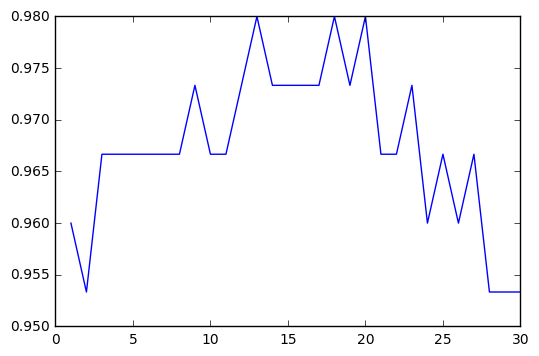

In [88]:
# note: sklearn.cross_validation' cross_val_score will be deprecated
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris

# fetch data first
X = load_iris().data
#X = preprocessing.scale(X)
y = load_iris().target

k_range = range(1,31)
k_scores = []

for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    k_scores.append(cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean())
    
print(k_scores)

# plotting
import matplotlib.pyplot as plt
plt.plot(k_range, k_scores)